#### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,2, and 3 in other folders as test data and other datasets as train data.

In [271]:
#(b)
import pandas as pd
import os
#cite from: https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688
all_fold=['bending1','bending2','cycling','sitting','lying','standing','walking']
dict_test_num={'bending1':2,'bending2':2,'walking':3,'standing':3,'sitting':3,'lying':3,'cycling':3}
dict_file_num={}
dict_test={}
dict_train={}

for fold_name in all_fold:
    i=0
    for file in os.listdir(fold_name):
        i+=1
    dict_file_num[fold_name]=i
    
for key,values in dict_test_num.items():
    x=key
    x_str=str(x)
    y=values
    for i in range(int(dict_file_num[x])):       
        i_str=str(i+1)
        if i<y:
            filename=x_str+'/'+'dataset'+i_str+'.csv'
            df_test=x_str+'_'+i_str+'_test'
            dict_test[df_test]=pd.read_csv(filename,skiprows=4,error_bad_lines=False)
        else:
            df_train=x_str+'_'+i_str+'_train'
            dict_train[df_train]=pd.read_csv(filename,skiprows=4,error_bad_lines=False)    

In [9]:
dict_test

{'bending1_1_test':      # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
 0                  0      39.25       0.43      22.75       0.43      33.75   
 1                250      39.25       0.43      23.00       0.00      33.00   
 2                500      39.25       0.43      23.25       0.43      33.00   
 3                750      39.50       0.50      23.00       0.71      33.00   
 4               1000      39.50       0.50      24.00       0.00      33.00   
 ..               ...        ...        ...        ...        ...        ...   
 475           118750      43.33       0.47      25.00       0.00      30.00   
 476           119000      43.50       0.50      25.50       0.50      30.00   
 477           119250      43.50       0.50      24.75       0.43      30.00   
 478           119500      43.50       0.50      24.33       0.47      30.00   
 479           119750      43.50       0.50      24.25       0.43      30.00   
 
      var_rss23  
 

In [10]:
dict_train

{'bending1_3_train':      # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
 0                  0      43.67       0.47      24.75       0.43      30.00   
 1                250      43.33       0.47      25.33       0.47      30.00   
 2                500      42.75       0.83      25.25       0.83      30.50   
 3                750      41.75       0.43      20.50       3.35      30.75   
 4               1000      42.50       0.50      20.75       4.55      31.75   
 ..               ...        ...        ...        ...        ...        ...   
 475           118750      43.00       0.71       9.50       2.18      30.25   
 476           119000      43.25       0.83      12.25       0.43      32.50   
 477           119250      43.50       0.50      13.00       2.35      32.50   
 478           119500      43.75       0.43      15.75       1.92      31.50   
 479           119750      43.25       0.83      20.75       0.43      31.00   
 
      var_rss23  


#### (c) i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

In [108]:
#c i.
print("Mean,",
"Zero crossing rate,",
"Maxima/Minima,",
"Autocorrelation,",
"Cross-correlation,",
"Linear correlation coefficient,",
"Standard deviation")

Mean, Zero crossing rate, Maxima/Minima, Autocorrelation, Cross-correlation, Linear correlation coefficient, Standard deviation


#### (c) ii. Extract the time-domain features minimum, maximum, mean, median, stan-dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [275]:
#c ii.
import pandas as pd

#cite from https://stackoverflow.com/questions/38987/how-to-merge-two-dictionaries-in-a-single-expression
def merge_two_dicts(x, y):
    """Given two dicts, merge them into a new dict as a shallow copy."""
    z = x.copy()
    z.update(y)
    return z
z = merge_two_dicts(dict_train,dict_test)

df_1=pd.DataFrame()
df_2=pd.DataFrame()

c=0

for key in z:
    #print(key)
    z_df=z[key]
    c+=1
    for j in range(1,7):
        df_2['instance']=[c]
        df_2['min'+str(j)]=[z_df.iloc[:,j].min()]
        df_2['max'+str(j)]=[z_df.iloc[:,j].max()]
        df_2['mean'+str(j)]=[z_df.iloc[:,j].mean()]
        df_2['median'+str(j)]=[z_df.iloc[:,j].median()]
        df_2['std'+str(j)]=[z_df.iloc[:,j].std()]
        df_2['1st.quantile'+str(j)]=[z_df.iloc[:,j].quantile(0.25)]
        df_2['3st.quantile'+str(j)]=[z_df.iloc[:,j].quantile(0.75)]
    #df= pd.DataFrame(map_data,columns=['min1', 'max1', 'mean1', 'median1','standard deviation1','first quartile1','third quartile1','min2', 'max2', 'mean2', 'median2','standard deviation2','first quartile2','third quartile2','min3', 'max3', 'mean3', 'median3','standard deviation3','first quartile3','third quartile3','min4', 'max4', 'mean4', 'median4','standard deviation4','first quartile4','third quartile4','min5', 'max5', 'mean5', 'median5','standard deviation5','first quartile5','third quartile5','min6', 'max6', 'mean6', 'median6','standard deviation6','first quartile6','third quartile6'])
    df_1=pd.concat([df_1,df_2])

In [276]:
df_1

,instance,min1,max1,mean1,median1,std1,1st.quantile1,3st.quantile1,min2,max2,...,std5,1st.quantile5,3st.quantile5,min6,max6,mean6,median6,std6,1st.quantile6,3st.quantile6
0,1,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,...,1.995255,32.00,34.5000,0.0,3.11,0.571083,0.43,0.601010,0.0000,1.30
0,2,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,...,1.995255,32.00,34.5000,0.0,3.11,0.571083,0.43,0.601010,0.0000,1.30
0,3,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,...,1.995255,32.00,34.5000,0.0,3.11,0.571083,0.43,0.601010,0.0000,1.30
0,4,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,...,1.995255,32.00,34.5000,0.0,3.11,0.571083,0.43,0.601010,0.0000,1.30
0,5,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,...,1.995255,32.00,34.5000,0.0,3.11,0.571083,0.43,0.601010,0.0000,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,84,24.75,48.33,44.182937,48.000,7.495615,48.00,48.0000,0.0,3.11,...,3.274539,2.00,5.5425,0.0,3.91,0.692771,0.50,0.675781,0.3225,0.94
0,85,48.00,48.25,48.004167,48.000,0.032038,48.00,48.0000,0.0,0.43,...,3.268502,4.67,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.4600,0.83
0,86,24.25,45.00,37.177042,36.250,3.581301,34.50,40.2500,0.0,8.58,...,2.890347,17.95,21.7500,0.0,9.34,2.921729,2.50,1.852600,1.5000,3.90
0,87,28.75,44.75,37.561188,36.875,3.226507,35.25,40.2500,0.0,9.91,...,2.727377,18.00,21.5000,0.0,9.62,2.765896,2.45,1.769203,1.4100,3.77


In [277]:
df_1_np=df_1.to_numpy()
df_1_np

array([[ 1.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 2.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 3.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       ...,
       [86.        , 24.25      , 45.        , ...,  1.85259997,
         1.5       ,  3.9       ],
       [87.        , 28.75      , 44.75      , ...,  1.76920256,
         1.41      ,  3.77      ],
       [88.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ]])

#### (c) iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [278]:
#c iii.
import numpy as np
def boostrap(array,nsample):
    bs=[]
    for col in range(1,len(df_1_np[0])):
        rand_data=np.random.choice(df_1_np[:,col],(nsample,len(df_1_np)))
        std=list(np.std(rand_data,axis=1))
        std.sort()
        interval=(std[int(nsample*0.5)],std[int(nsample*0.95)])
        bs.append(interval)
    return bs
df_1_np_b=boostrap(df_1_np,100)
print(df_1_np_b)
#cite from: https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html

[(13.681610637205663, 15.022244566151512), (2.3100423029962527, 3.4686731135846394), (5.907033144754008, 6.6872338147391615), (6.234376947792732, 6.732457541111708), (1.8939534167419112, 2.0528679703645585), (6.987220502768362, 7.512746577011052), (5.101160316623804, 5.700963335023457), (0.0, 0.0), (5.613126605489689, 5.88954414667908), (1.5265200558641958, 1.6570375819151282), (1.3916022810323285, 1.5235444889852594), (0.921003498955623, 0.9818598648220263), (0.9015744593109425, 0.9944666512530953), (2.065672918637497, 2.2759138567815884), (2.4523371774115557, 2.581105092684812), (5.447996825308764, 6.199503244853941), (4.565006161944532, 5.009298944986594), (4.5915945764115795, 5.1120317873964005), (0.5825739388368305, 0.6603836780787836), (4.646736398928257, 5.1333073356231855), (4.876185010403299, 5.366152164222217), (0.0, 0.0), (2.150448801778422, 2.3170398674639494), (1.1256959811898282, 1.1753233647287342), (1.1113553968252847, 1.172274973064841), (0.4381425580726379, 0.47188946

#### (c) iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

In [36]:
#c.iv
print("min, mean, max")

min, mean, max


#### (d) i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook)

In [285]:
#d.i
df_train=pd.DataFrame()
df_3=pd.DataFrame()
tr_i=0

for key in dict_train:
    #print(key)
    tr_i+=1
    for j in range(1,7):
        df_3['instance']=[tr_i]
        df_3['min'+str(j)]=[dict_train[key].iloc[:,j].min()]
        df_3['max'+str(j)]=[dict_train[key].iloc[:,j].max()]
        df_3['mean'+str(j)]=[dict_train[key].iloc[:,j].mean()]
        df_3['median'+str(j)]=[dict_train[key].iloc[:,j].median()]
        df_3['std'+str(j)]=[dict_train[key].iloc[:,j].std()]
        df_3['1st.quartile'+str(j)]=[dict_train[key].iloc[:,j].quantile(0.25)]
        df_3['3st.quartile'+str(j)]=[dict_train[key].iloc[:,j].quantile(0.75)]
    #df= pd.DataFrame(map_data,columns=['min1', 'max1', 'mean1', 'median1','standard deviation1','first quartile1','third quartile1','min2', 'max2', 'mean2', 'median2','standard deviation2','first quartile2','third quartile2','min3', 'max3', 'mean3', 'median3','standard deviation3','first quartile3','third quartile3','min4', 'max4', 'mean4', 'median4','standard deviation4','first quartile4','third quartile4','min5', 'max5', 'mean5', 'median5','standard deviation5','first quartile5','third quartile5','min6', 'max6', 'mean6', 'median6','standard deviation6','first quartile6','third quartile6'])
    df_train=pd.concat([df_3,df_train])
# cite from: https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html

In [52]:
df_train

,instance,min1,max1,mean1,median1,std1,1st.quartile1,3st.quartile1,min2,max2,...,std5,1st.quartile5,3st.quartile5,min6,max6,mean6,median6,std6,1st.quartile6,3st.quartile6
0,69,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,68,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,67,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,66,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,65,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,4,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,3,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,2,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30


In [68]:
df_train_np=df_train.to_numpy()
df_train_np

array([[69.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       [68.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       [67.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       ...,
       [ 3.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 2.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 1.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ]])

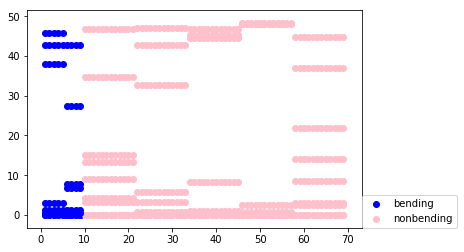

In [95]:
#d.i
import matplotlib.pyplot as plt

plt.scatter(x=df_train_np[-9:,0], y=df_train_np[-9:,1], color='blue', label='bending') #bending min1
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,1], color='pink', label='nonbending') #nonbending min1

plt.scatter(x=df_train_np[-9:,0],y=df_train_np[-9:,8],color='blue') #bending min2
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,8], color='pink') #nonbending min2

plt.scatter(x=df_train_np[-9:,0],y=df_train_np[-9:,36],color='blue') #bending min6
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,36], color='pink') #nonbending min6

plt.scatter(x=df_train_np[-9:,0], y=df_train_np[-9:,2], color='blue') #bending max1
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,2], color='pink') #nonbending max1

plt.scatter(x=df_train_np[-9:,0], y=df_train_np[-9:,9], color='blue') #bending max2
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,9], color='pink') #nonbending max2

plt.scatter(x=df_train_np[-9:,0], y=df_train_np[-9:,37], color='blue') #bending max6
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,37], color='pink') #nonbending max6

plt.scatter(x=df_train_np[-9:,0], y=df_train_np[-9:,3], color='blue') #bending mean1
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,3], color='pink') #nonbending mean1

plt.scatter(x=df_train_np[-9:,0], y=df_train_np[-9:,10], color='blue') #bending mean2
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,10], color='pink') #nonbending mean2

plt.scatter(x=df_train_np[-9:,0], y=df_train_np[-9:,38], color='blue') #bending mean6
plt.scatter(x=df_train_np[:-9,0], y=df_train_np[:-9,38], color='pink') #nonbending mean6

#plt.xlabel('AT')
#plt.ylabel('PE')
plt.legend(loc=(1, 0))
plt.show()

#### d (ii). Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?

In [284]:
#d.ii
df_train_2=pd.DataFrame()
df_4=pd.DataFrame()
tr2_i=0

for key in dict_train:
    #print(key)
    tr2_i+=1
    for j in range(1,13):
        for k in range(1,7):
            df_4['instance']=[tr2_i]
            df_4['min'+str(j)]=[dict_train[key].iloc[:,k].min()]
            df_4['max'+str(j)]=[dict_train[key].iloc[:,k].max()]
            df_4['mean'+str(j)]=[dict_train[key].iloc[:,k].mean()]
            df_4['median'+str(j)]=[dict_train[key].iloc[:,k].median()]
            df_4['std'+str(j)]=[dict_train[key].iloc[:,k].std()]
            df_4['1st.quartile'+str(j)]=[dict_train[key].iloc[:,k].quantile(0.25)]
            df_4['3st.quartile'+str(j)]=[dict_train[key].iloc[:,k].quantile(0.75)]
    #df= pd.DataFrame(map_data,columns=['min1', 'max1', 'mean1', 'median1','standard deviation1','first quartile1','third quartile1','min2', 'max2', 'mean2', 'median2','standard deviation2','first quartile2','third quartile2','min3', 'max3', 'mean3', 'median3','standard deviation3','first quartile3','third quartile3','min4', 'max4', 'mean4', 'median4','standard deviation4','first quartile4','third quartile4','min5', 'max5', 'mean5', 'median5','standard deviation5','first quartile5','third quartile5','min6', 'max6', 'mean6', 'median6','standard deviation6','first quartile6','third quartile6'])
    df_train_2=pd.concat([df_4,df_train_2])

In [58]:
df_train_2

,instance,min1,max1,mean1,median1,std1,1st.quartile1,3st.quartile1,min2,max2,...,std11,1st.quartile11,3st.quartile11,min12,max12,mean12,median12,std12,1st.quartile12,3st.quartile12
0,69,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15,0.0,8.55,...,1.81573,1.5,4.15,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,68,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15,0.0,8.55,...,1.81573,1.5,4.15,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,67,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15,0.0,8.55,...,1.81573,1.5,4.15,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,66,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15,0.0,8.55,...,1.81573,1.5,4.15,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,65,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15,0.0,8.55,...,1.81573,1.5,4.15,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30,0.0,3.11,...,0.60101,0.0,1.30,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,4,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30,0.0,3.11,...,0.60101,0.0,1.30,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,3,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30,0.0,3.11,...,0.60101,0.0,1.30,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,2,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30,0.0,3.11,...,0.60101,0.0,1.30,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30


In [97]:
df_train_2_np=df_train_2.to_numpy()
df_train_2_np

array([[69.        ,  0.        ,  8.55      , ...,  1.81572972,
         1.5       ,  4.15      ],
       [68.        ,  0.        ,  8.55      , ...,  1.81572972,
         1.5       ,  4.15      ],
       [67.        ,  0.        ,  8.55      , ...,  1.81572972,
         1.5       ,  4.15      ],
       ...,
       [ 3.        ,  0.        ,  3.11      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 2.        ,  0.        ,  3.11      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 1.        ,  0.        ,  3.11      , ...,  0.60100965,
         0.        ,  1.3       ]])

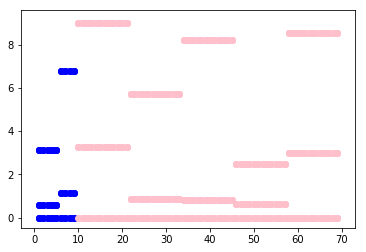

In [98]:
#d.ii
plt.scatter(x=df_train_2_np[-9:,0], y=df_train_2_np[-9:,1], color='blue', label='bending') #bending min1
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,1], color='pink', label='nonbending') #nonbending min1

plt.scatter(x=df_train_2_np[-9:,0],y=df_train_2_np[-9:,8],color='blue') #bending min2
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,8], color='pink') #nonbending min2

plt.scatter(x=df_train_2_np[-9:,0],y=df_train_2_np[-9:,78],color='blue') #bending min12
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,78], color='pink') #nonbending min12

plt.scatter(x=df_train_2_np[-9:,0], y=df_train_2_np[-9:,2], color='blue') #bending max1
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,2], color='pink') #nonbending max1

plt.scatter(x=df_train_2_np[-9:,0], y=df_train_2_np[-9:,9], color='blue') #bending max2
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,9], color='pink') #nonbending max2

plt.scatter(x=df_train_2_np[-9:,0],y=df_train_2_np[-9:,79],color='blue') #bending max12
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,79], color='pink') #nonbending max12

plt.scatter(x=df_train_2_np[-9:,0], y=df_train_2_np[-9:,3], color='blue') #bending mean1
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,3], color='pink') #nonbending mean1

plt.scatter(x=df_train_2_np[-9:,0], y=df_train_2_np[-9:,10], color='blue') #bending mean2
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,10], color='pink') #nonbending mean2

plt.scatter(x=df_train_2_np[-9:,0], y=df_train_2_np[-9:,80], color='blue') #bending mean12
plt.scatter(x=df_train_2_np[:-9,0], y=df_train_2_np[:-9,80], color='pink') #nonbending mean12


In [182]:
dict_train.items()

dict_items([('bending1_3_train',      # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      43.67       0.47      24.75       0.43      30.00   
1                250      43.33       0.47      25.33       0.47      30.00   
2                500      42.75       0.83      25.25       0.83      30.50   
3                750      41.75       0.43      20.50       3.35      30.75   
4               1000      42.50       0.50      20.75       4.55      31.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      43.00       0.71       9.50       2.18      30.25   
476           119000      43.25       0.83      12.25       0.43      32.50   
477           119250      43.50       0.50      13.00       2.35      32.50   
478           119500      43.75       0.43      15.75       1.92      31.50   
479           119750      43.25       0.83      20.75       0.43      31.00   

     var_rss23  
0

#### (d) iii. Break each time series in your training set into l∈ {1,2, . . . ,20} time series of approximately equal length and use logistic regression 5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. 6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. 7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratifiedcross validation. Research what it means and use it if needed.

In [117]:
df_train

,instance,min1,max1,mean1,median1,std1,1st.quartile1,3st.quartile1,min2,max2,...,std5,1st.quartile5,3st.quartile5,min6,max6,mean6,median6,std6,1st.quartile6,3st.quartile6
0,69,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,68,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,67,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,66,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,65,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,4,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,3,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,2,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30


In [286]:
df_a=pd.DataFrame()
df_b=pd.DataFrame()

c=0

for key in dict_train:
    #print(key)
    c+=1
    for j in range(1,2):
        df_b['instance']=[c]
        df_b['# Columns: time']=[tr_df.iloc[:,0]]
        df_b['avg_rss12']=[dict_train[key].iloc[:,1]]
        df_b['var_rss12']=[dict_train[key].iloc[:,2]]
        df_b['avg_rss13']=[dict_train[key].iloc[:,3]]
        df_b['var_rss13']=[dict_train[key].iloc[:,4]]
        df_b['avg_rss23']=[dict_train[key].iloc[:,5]]
        df_b['var_rss23']=[dict_train[key].iloc[:,6]]
    #df= pd.DataFrame(map_data,columns=['min1', 'max1', 'mean1', 'median1','standard deviation1','first quartile1','third quartile1','min2', 'max2', 'mean2', 'median2','standard deviation2','first quartile2','third quartile2','min3', 'max3', 'mean3', 'median3','standard deviation3','first quartile3','third quartile3','min4', 'max4', 'mean4', 'median4','standard deviation4','first quartile4','third quartile4','min5', 'max5', 'mean5', 'median5','standard deviation5','first quartile5','third quartile5','min6', 'max6', 'mean6', 'median6','standard deviation6','first quartile6','third quartile6'])
    df_a=pd.concat([df_b,df_a])

In [163]:
df_a

,instance,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,69,0 0 1 250 2 500 3 ...,0 35.50 1 33.50 2 42.00 3 ...,0 3.84 1 12.99 2 0.00 3 ...,0 19.75 1 16.50 2 9.00 3 ...,0 2.77 1 4.72 2 3.67 3 0.4...,0 20.25 1 22.50 2 20.25 3 ...,0 3.27 1 1.50 2 1.30 3 2.4...
0,68,0 0 1 250 2 500 3 ...,0 35.50 1 33.50 2 42.00 3 ...,0 3.84 1 12.99 2 0.00 3 ...,0 19.75 1 16.50 2 9.00 3 ...,0 2.77 1 4.72 2 3.67 3 0.4...,0 20.25 1 22.50 2 20.25 3 ...,0 3.27 1 1.50 2 1.30 3 2.4...
0,67,0 0 1 250 2 500 3 ...,0 35.50 1 33.50 2 42.00 3 ...,0 3.84 1 12.99 2 0.00 3 ...,0 19.75 1 16.50 2 9.00 3 ...,0 2.77 1 4.72 2 3.67 3 0.4...,0 20.25 1 22.50 2 20.25 3 ...,0 3.27 1 1.50 2 1.30 3 2.4...
0,66,0 0 1 250 2 500 3 ...,0 35.50 1 33.50 2 42.00 3 ...,0 3.84 1 12.99 2 0.00 3 ...,0 19.75 1 16.50 2 9.00 3 ...,0 2.77 1 4.72 2 3.67 3 0.4...,0 20.25 1 22.50 2 20.25 3 ...,0 3.27 1 1.50 2 1.30 3 2.4...
0,65,0 0 1 250 2 500 3 ...,0 35.50 1 33.50 2 42.00 3 ...,0 3.84 1 12.99 2 0.00 3 ...,0 19.75 1 16.50 2 9.00 3 ...,0 2.77 1 4.72 2 3.67 3 0.4...,0 20.25 1 22.50 2 20.25 3 ...,0 3.27 1 1.50 2 1.30 3 2.4...
...,...,...,...,...,...,...,...,...
0,5,0 0 1 250 2 500 3 ...,0 43.67 1 43.33 2 42.75 3 ...,0 0.47 1 0.47 2 0.83 3 0.4...,0 24.75 1 25.33 2 25.25 3 ...,0 0.43 1 0.47 2 0.83 3 3.3...,0 30.00 1 30.00 2 30.50 3 ...,0 0.00 1 0.00 2 0.50 3 0.8...
0,4,0 0 1 250 2 500 3 ...,0 43.67 1 43.33 2 42.75 3 ...,0 0.47 1 0.47 2 0.83 3 0.4...,0 24.75 1 25.33 2 25.25 3 ...,0 0.43 1 0.47 2 0.83 3 3.3...,0 30.00 1 30.00 2 30.50 3 ...,0 0.00 1 0.00 2 0.50 3 0.8...
0,3,0 0 1 250 2 500 3 ...,0 43.67 1 43.33 2 42.75 3 ...,0 0.47 1 0.47 2 0.83 3 0.4...,0 24.75 1 25.33 2 25.25 3 ...,0 0.43 1 0.47 2 0.83 3 3.3...,0 30.00 1 30.00 2 30.50 3 ...,0 0.00 1 0.00 2 0.50 3 0.8...
0,2,0 0 1 250 2 500 3 ...,0 43.67 1 43.33 2 42.75 3 ...,0 0.47 1 0.47 2 0.83 3 0.4...,0 24.75 1 25.33 2 25.25 3 ...,0 0.43 1 0.47 2 0.83 3 3.3...,0 30.00 1 30.00 2 30.50 3 ...,0 0.00 1 0.00 2 0.50 3 0.8...


In [164]:
train_np=df_a.to_numpy()
train_np

array([[69,
        0           0
1         250
2         500
3         750
4        1000
        ...  
475    118750
476    119000
477    119250
478    119500
479    119750
Name: # Columns: time, Length: 480, dtype: int64,
        0      35.50
1      33.50
2      42.00
3      41.50
4      35.25
       ...  
475    36.50
476    36.00
477    32.33
478    32.00
479    38.00
Name: avg_rss12, Length: 480, dtype: float64,
        0       3.84
1      12.99
2       0.00
3       1.50
4       2.49
       ...  
475     1.50
476     0.00
477     5.56
478     5.87
479     2.12
Name: var_rss12, Length: 480, dtype: float64,
        0      19.75
1      16.50
2       9.00
3      12.33
4      19.50
       ...  
475    15.67
476    23.25
477    15.33
478    12.25
479    16.50
Name: avg_rss13, Length: 480, dtype: float64,
        0      2.77
1      4.72
2      3.67
3      0.47
4      3.35
       ... 
475    9.74
476    1.30
477    3.77
478    2.17
479    3.20
Name: var_rss13, Length: 480, dtype: float64,

In [165]:
np.split(train_np,3)

[array([[69,
         0           0
 1         250
 2         500
 3         750
 4        1000
         ...  
 475    118750
 476    119000
 477    119250
 478    119500
 479    119750
 Name: # Columns: time, Length: 480, dtype: int64,
         0      35.50
 1      33.50
 2      42.00
 3      41.50
 4      35.25
        ...  
 475    36.50
 476    36.00
 477    32.33
 478    32.00
 479    38.00
 Name: avg_rss12, Length: 480, dtype: float64,
         0       3.84
 1      12.99
 2       0.00
 3       1.50
 4       2.49
        ...  
 475     1.50
 476     0.00
 477     5.56
 478     5.87
 479     2.12
 Name: var_rss12, Length: 480, dtype: float64,
         0      19.75
 1      16.50
 2       9.00
 3      12.33
 4      19.50
        ...  
 475    15.67
 476    23.25
 477    15.33
 478    12.25
 479    16.50
 Name: avg_rss13, Length: 480, dtype: float64,
         0      2.77
 1      4.72
 2      3.67
 3      0.47
 4      3.35
        ... 
 475    9.74
 476    1.30
 477    3.77
 478    2.1

In [238]:
dict_test2={}
dict_train2={}
all_fold=['bending1','bending2','cycling','sitting','lying','standing','walking']
columns=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']


for n in range(len(all_fold)):
    for i in range(1,fold_num[n]+1):
        x_str=str(x)
        i_str=str(i+1)
        if i<y:
            filename=x_str+'/'+'dataset'+i_str+'.csv'
            df_test=x_str+'_'+i_str+'_test'
            df=pd.read_csv(filename,skiprows=4,error_bad_lines=False)
        else:
            df_train=x_str+'_'+i_str+'_train'
            df2=pd.read_csv(filename,skiprows=4,error_bad_lines=False)

In [188]:
dff= pd.DataFrame(dict_trainset)
dff

,train_min11,train_max11,train_mean11,train_min12,train_max12,train_mean12,train_min13,train_max13,train_mean13,train_min14,...,train_mean617,train_min618,train_max618,train_mean618,train_min619,train_max619,train_mean619,train_min620,train_max620,train_mean620
0,40.00,45.00,43.513750,43.75,45.00,44.537917,44.00,45.00,44.572917,41.50,...,0.309583,0.00,0.87,0.036250,0.00,0.50,0.076250,0.00,1.30,0.183333
1,36.00,47.50,44.097083,36.00,47.75,44.343750,36.33,45.33,44.162917,35.75,...,0.697500,0.00,1.50,0.535417,0.00,1.50,0.709167,0.00,1.30,0.350000
2,36.00,44.50,41.563750,38.60,45.00,41.777083,39.00,44.60,42.112083,34.50,...,0.230000,0.00,0.75,0.298750,0.00,0.83,0.350833,0.00,1.00,0.307500
3,41.00,46.75,44.756667,44.50,45.00,44.958333,45.00,45.25,45.031250,45.00,...,0.485417,0.00,1.22,0.358333,0.00,1.00,0.252083,0.00,4.06,1.074583
4,41.50,44.25,42.951250,40.75,44.50,43.116250,41.75,43.00,42.394583,41.50,...,0.905417,0.00,1.30,0.561250,0.00,1.00,0.562917,0.00,1.73,0.671250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,27.00,42.33,34.305417,26.67,45.00,35.875000,23.25,41.25,32.775417,19.50,...,3.140000,1.22,6.80,3.595833,0.82,6.22,3.027083,0.47,6.00,3.315833
65,27.00,44.50,34.840417,22.00,43.33,33.975833,26.25,41.33,34.621250,25.25,...,3.458750,0.47,7.81,3.047500,0.00,8.08,3.453333,0.50,8.38,3.404583
66,24.00,41.50,33.635417,25.00,43.33,34.511250,24.50,43.00,34.027917,23.25,...,3.469167,0.00,8.14,3.585000,0.43,7.09,3.609167,1.25,7.72,3.834167
67,24.75,42.75,35.222083,26.50,41.75,33.896250,28.50,41.00,35.361250,24.33,...,3.938333,1.25,7.18,3.363750,0.47,5.70,2.987500,0.82,6.87,3.914583


In [89]:
ytrain_num=[0]*60+[1]*9
ytrain_num_np=np.asarray(ytrain_num)
ytrain_num_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [219]:
#trainingset
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#dict_train3={}
file_fold=['cycling','sitting','lying','standing','walking']
list_tr=[]
for i in range(3,4):
    df_tr_b1=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/bending1/dataset{}.csv".format(i),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
    df_tr_b1.values.tolist()
    list_tr.append(df_tr_b1)
    #df_train_3=x_str+'_'+i_str+'_train'
    #dict_train_3[df_train_3]=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/bending1/dataset{}.csv".format(i),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
for i in range(4,5):
    df_tr_b1=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/bending1/dataset{}.csv".format(i),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
    df_tr_b1=df_tr_b1.to_numpy()[:,0:-1]
    df_tr_b1=pd.DataFrame(df_tr_b1)
    df_tr_b1.values.tolist()
    list_tr.append(df_tr_b1)
    
for i in range(5,8):
    df_tr_b1=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/bending1/dataset{}.csv".format(i),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
    df_tr_b1.values.tolist()
    list_tr.append(df_tr_b1)
    
for j in range(3,7):
    df_tr_b2=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/bending2/dataset{}.csv".format(j),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
    df_tr_b2.values.tolist()
    list_tr.append(df_tr_b2)

for file in file_fold:
    for a in range(4,16):
        df_tr_file=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/{}/dataset{}.csv".format(file,a),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
        df_tr_file.values.tolist()
        list_tr.append(df_tr_file)   
        


In [15]:
ytrain_num=[0]*60+[1]*9

In [382]:
file_fold=['cycling','sitting','lying','standing','walking']
list_te=[]
for i in range(1,3):
    df_te_b1=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/bending1/dataset{}.csv".format(i),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
    df_te_b1.values.tolist()
    list_te.append(df_te_b1)
    
for j in range(1,3):
    df_te_b2=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/bending2/dataset{}.csv".format(j),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
    df_te_b2.values.tolist()
    list_te.append(df_te_b2)

for file in file_fold:
    for a in range(1,4):
        df_te_file=pd.read_csv("/Users/pks19951017/Desktop/inf552/552_hw3/{}/dataset{}.csv".format(file,a),skiprows=4,usecols=[0,1,2,3,4,5,6],error_bad_lines=False)
        df_te_file.values.tolist()
        list_te.append(df_te_file)   
        

In [305]:
list_tr

[     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
 0                  0      42.00       0.71      21.25       0.43      30.00   
 1                250      41.50       0.50      20.25       1.48      31.25   
 2                500      41.50       0.50      14.25       1.92      33.00   
 3                750      40.75       0.83      15.75       0.43      33.00   
 4               1000      40.00       0.71      20.00       2.74      32.75   
 ..               ...        ...        ...        ...        ...        ...   
 475           118750      42.50       0.50      20.00       0.82      36.00   
 476           119000      42.67       0.47      21.00       0.00      36.33   
 477           119250      44.33       0.94      21.00       0.00      36.33   
 478           119500      45.25       0.43      26.75       1.79      36.00   
 479           119750      47.25       0.83      29.75       0.43      35.25   
 
      var_rss23  
 0         0.00  
 1

In [328]:
list_tr_np=np.array(list_tr_df)
list_tr_np

array([[     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      42.50       0.50      20.00       0.82      36.00   
476           119000      42.67       0.47      21.00       0.00      36.33   
477           119250      44.33       0.94      21.00       0.00      36.33   
478           119500      45.25       0.43      26.75       1.79      36.00   
479           119750      47.25       0.83      29.75       0.43      35.25   

     var_rss23  
0         0.00  
1        

In [245]:
df_train=pd.DataFrame()
df_3=pd.DataFrame()
tr_i=0

for key in dict_train:
    #print(key)
    tr_df=dict_train[key]
    tr_i+=1
    for j in range(1,7):
        df_3['instance']=[tr_i]
        df_3['min'+str(j)]=[tr_df.iloc[:,j].min()]
        df_3['max'+str(j)]=[tr_df.iloc[:,j].max()]
        df_3['mean'+str(j)]=[tr_df.iloc[:,j].mean()]
        df_3['median'+str(j)]=[tr_df.iloc[:,j].median()]
        df_3['std'+str(j)]=[tr_df.iloc[:,j].std()]
        df_3['1st.quartile'+str(j)]=[tr_df.iloc[:,j].quantile(0.25)]
        df_3['3st.quartile'+str(j)]=[tr_df.iloc[:,j].quantile(0.75)]
    #df= pd.DataFrame(map_data,columns=['min1', 'max1', 'mean1', 'median1','standard deviation1','first quartile1','third quartile1','min2', 'max2', 'mean2', 'median2','standard deviation2','first quartile2','third quartile2','min3', 'max3', 'mean3', 'median3','standard deviation3','first quartile3','third quartile3','min4', 'max4', 'mean4', 'median4','standard deviation4','first quartile4','third quartile4','min5', 'max5', 'mean5', 'median5','standard deviation5','first quartile5','third quartile5','min6', 'max6', 'mean6', 'median6','standard deviation6','first quartile6','third quartile6'])
    df_train=pd.concat([df_3,df_train])

In [242]:
df_train

,instance,min1,max1,mean1,median1,std1,1st.quartile1,3st.quartile1,min2,max2,...,std5,1st.quartile5,3st.quartile5,min6,max6,mean6,median6,std6,1st.quartile6,3st.quartile6
0,69,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,68,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,67,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,66,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,65,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,4,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,3,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,2,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30


In [246]:
df_train.set_index('instance')

,min1,max1,mean1,median1,std1,1st.quartile1,3st.quartile1,min2,max2,mean2,...,std5,1st.quartile5,3st.quartile5,min6,max6,mean6,median6,std6,1st.quartile6,3st.quartile6
instance,,,,,,,,,,,,,,,,,,,,,
69,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,2.438146,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
68,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,2.438146,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
67,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,2.438146,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
66,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,2.438146,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
65,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,2.438146,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,0.372438,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
4,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,0.372438,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
3,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,0.372438,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30


In [264]:
df_train_np=df_train.to_numpy()
df_train_np

array([[69.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       [68.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       [67.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       ...,
       [ 3.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 2.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 1.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ]])

In [239]:
df_test=pd.DataFrame()
df_t1=pd.DataFrame()
te_i=0

for key in dict_test:
    #print(key)
    te_df=dict_test[key]
    te_i+=1
    for j in range(1,7):
        df_t1['instance']=[te_i]
        df_t1['min'+str(j)]=[te_df.iloc[:,j].min()]
        df_t1['max'+str(j)]=[te_df.iloc[:,j].max()]
        df_t1['mean'+str(j)]=[te_df.iloc[:,j].mean()]
        df_t1['median'+str(j)]=[te_df.iloc[:,j].median()]
        df_t1['std'+str(j)]=[te_df.iloc[:,j].std()]
        df_t1['1st.quartile'+str(j)]=[te_df.iloc[:,j].quantile(0.25)]
        df_t1['3st.quartile'+str(j)]=[te_df.iloc[:,j].quantile(0.75)]
    #df= pd.DataFrame(map_data,columns=['min1', 'max1', 'mean1', 'median1','standard deviation1','first quartile1','third quartile1','min2', 'max2', 'mean2', 'median2','standard deviation2','first quartile2','third quartile2','min3', 'max3', 'mean3', 'median3','standard deviation3','first quartile3','third quartile3','min4', 'max4', 'mean4', 'median4','standard deviation4','first quartile4','third quartile4','min5', 'max5', 'mean5', 'median5','standard deviation5','first quartile5','third quartile5','min6', 'max6', 'mean6', 'median6','standard deviation6','first quartile6','third quartile6'])
    df_test=pd.concat([df_t1,df_test])

In [240]:
df_test

,instance,min1,max1,mean1,median1,std1,1st.quartile1,3st.quartile1,min2,max2,...,std5,1st.quartile5,3st.quartile5,min6,max6,mean6,median6,std6,1st.quartile6,3st.quartile6
0,19,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,...,3.537144,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150
0,18,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,...,2.727377,18.0000,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770
0,17,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900
0,16,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,...,3.268502,4.6700,10.0000,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830
0,15,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,...,3.274539,2.0000,5.5425,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940
0,14,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,...,4.074511,5.5000,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000
0,13,44.50,46.75,45.239667,45.000,0.429915,45.0000,45.3300,0.0,1.00,...,2.945840,17.6275,21.0000,0.0,8.20,0.837250,0.710,0.835344,0.4300,1.120
0,12,37.00,50.75,45.917667,45.635,1.089027,45.0000,46.5000,0.0,4.87,...,3.585511,16.5000,21.0000,0.0,7.22,0.904604,0.710,0.896171,0.4300,1.120
0,11,33.25,48.00,42.363563,43.000,2.068247,42.0000,43.5000,0.0,4.44,...,4.956821,10.1875,17.6900,0.0,6.02,1.034021,0.830,0.985627,0.4700,1.250
0,10,32.75,47.00,42.760563,44.500,3.398919,41.3300,45.3725,0.0,3.34,...,4.296574,13.0000,18.5650,0.0,5.73,0.842271,0.710,0.722165,0.4300,1.090


In [379]:
df_test.set_index('instance')

,min1,max1,mean1,median1,std1,1st.quartile1,3st.quartile1,min2,max2,mean2,...,std5,1st.quartile5,3st.quartile5,min6,max6,mean6,median6,std6,1st.quartile6,3st.quartile6
instance,,,,,,,,,,,,,,,,,,,,,
19,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,2.438146,...,3.537144,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150
18,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,2.080688,...,2.727377,18.0000,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770
17,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900
16,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,0.007167,...,3.268502,4.6700,10.0000,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830
15,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,0.101875,...,3.274539,2.0000,5.5425,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940
14,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,0.363688,...,4.074511,5.5000,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000
13,44.50,46.75,45.239667,45.000,0.429915,45.0000,45.3300,0.0,1.00,0.172958,...,2.945840,17.6275,21.0000,0.0,8.20,0.837250,0.710,0.835344,0.4300,1.120
12,37.00,50.75,45.917667,45.635,1.089027,45.0000,46.5000,0.0,4.87,0.324542,...,3.585511,16.5000,21.0000,0.0,7.22,0.904604,0.710,0.896171,0.4300,1.120
11,33.25,48.00,42.363563,43.000,2.068247,42.0000,43.5000,0.0,4.44,0.492563,...,4.956821,10.1875,17.6900,0.0,6.02,1.034021,0.830,0.985627,0.4700,1.250


In [381]:
df_test_np=df_test.to_numpy()

In [257]:
#建list
#設0,1
ytrain_num=[0]*60+[1]*9
ytest_num=[0]*15+[1]*4

In [256]:
ytrain_num_np=np.asarray(ytrain_num)
ytrain_num_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [260]:
ytest_num_np=np.asarray(ytest_num)
ytest_num_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [93]:
df_train=pd.DataFrame()
df_3=pd.DataFrame()
tr_i=0

for key in dict_train:
    #print(key)
    tr_df=dict_train[key]
    tr_i+=1
    for j in range(1,7):
        df_3['instance']=[tr_i]
        df_3['min'+str(j)]=[tr_df.iloc[:,j].min()]
        df_3['max'+str(j)]=[tr_df.iloc[:,j].max()]
        df_3['mean'+str(j)]=[tr_df.iloc[:,j].mean()]
        df_3['median'+str(j)]=[tr_df.iloc[:,j].median()]
        df_3['std'+str(j)]=[tr_df.iloc[:,j].std()]
        df_3['1st.quartile'+str(j)]=[tr_df.iloc[:,j].quantile(0.25)]
        df_3['3st.quartile'+str(j)]=[tr_df.iloc[:,j].quantile(0.75)]
    #df= pd.DataFrame(map_data,columns=['min1', 'max1', 'mean1', 'median1','standard deviation1','first quartile1','third quartile1','min2', 'max2', 'mean2', 'median2','standard deviation2','first quartile2','third quartile2','min3', 'max3', 'mean3', 'median3','standard deviation3','first quartile3','third quartile3','min4', 'max4', 'mean4', 'median4','standard deviation4','first quartile4','third quartile4','min5', 'max5', 'mean5', 'median5','standard deviation5','first quartile5','third quartile5','min6', 'max6', 'mean6', 'median6','standard deviation6','first quartile6','third quartile6'])
    df_train=pd.concat([df_3,df_train])

In [94]:
df_train

,instance,min1,max1,mean1,median1,std1,1st.quartile1,3st.quartile1,min2,max2,...,std5,1st.quartile5,3st.quartile5,min6,max6,mean6,median6,std6,1st.quartile6,3st.quartile6
0,69,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,68,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,67,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,66,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
0,65,22.0,44.67,37.058708,36.0,3.71018,34.5,40.0625,0.0,14.17,...,3.537144,16.0,21.0,0.0,8.55,2.983750,2.57,1.81573,1.5,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,4,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,3,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30
0,2,38.0,45.67,42.812812,42.5,1.43555,42.0,43.6700,0.0,1.22,...,1.995255,32.0,34.5,0.0,3.11,0.571083,0.43,0.60101,0.0,1.30


In [95]:
df_train_np=df_train.to_numpy()
df_train_np

array([[69.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       [68.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       [67.        , 22.        , 44.67      , ...,  1.81572972,
         1.5       ,  4.15      ],
       ...,
       [ 3.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 2.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ],
       [ 1.        , 38.        , 45.67      , ...,  0.60100965,
         0.        ,  1.3       ]])

In [106]:
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score

rfe_trcv=RFECV(model, step=1, cv=3, scoring='accuracy')
rfe_trcv=rfe_trcv.fit(df_train_np//l,ytrain_num_np)
f1_score=f1_score(ytrain_num_np,rfe_trcv.predict(df_train_np//l))
print("f1_score:",f1_score)

f1_score: 1.0


In [282]:
def sliced(l):
    d3_df=pd.DataFrame()
    d3_df2=pd.DataFrame()
    d_f=pd.DataFrame()
    ret=pd.DataFrame()
    c=0
    for j in range(l,l+1):
        for key in dict_train:
            c+=1
            for i in range(1,7):
                d=0
                d_2=480//j
                for x in range(1,j+1):
                    d3_df2['Instance']=[c]
                    d3_df2['min'+str(i)+str(x)]=[dict_train[key].iloc[d:d_2,i].min()]
                    d3_df2['max'+str(i)+str(x)]=[dict_train[key].iloc[d:d_2,i].max()]
                    d3_df2['mean'+str(i)+str(x)]=[dict_train[key].iloc[d:d_2,i].mean()]
                    d+=480//j              
                    d_2+=480//j
            d3_df=pd.concat([d3_df,d3_df2])
        d_f=pd.concat([d_f,d3_df],axis=1)
    ret=d_f
    return ret

for k in range(1,21):
    model=LogisticRegression()
    rfe_tr=RFE(model,3)
    rfe_tr=rfe.fit(sliced(k),ytrain_num_np)
                #print(split)
    print(rfe_tr.support_)
    print(rfe_tr.ranking_)

[ True False  True  True False False False False False False False False
 False False False False False False False]
[ 1  4  1  1 16  7 14 11  2  6 15  8 13 10  3  5 17  9 12]
[ True False  True False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
[ 1  4  1  2  9  1  3 31 15 29 35 14 28 23  6 12 22  8 13 32 21 26 30 16
 25 18  5 10 17  7 11 33 20 27 34 19 24]
[ True False False False False  True False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
[ 1  6  2  3  7  1  4 13  1  5 48 22 44 47 27 43 53 21 41 35 10 18 30 12
 17 34  9 20 52 32 40 49 33 37 50 23 38 24  8 15 26 11 16 25 14 19 51 31
 

[ True False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[ True False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [257]:
# cite from: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score

for k in range(1,21):
    rfe_trcv=RFECV(model, step=1, cv=3, scoring='accuracy')
    rfe_trcv=rfe_trcv.fit(sliced(k),ytrain_num_np)
    print(rfe_tr.support_)
    print(rfe_tr.ranking_)
    

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [258]:
def sliced_2(l):
    d3_df=pd.DataFrame()
    d3_df2=pd.DataFrame()
    d_f=pd.DataFrame()
    ret_2=pd.DataFrame()
    c=0
    for j in range(l,l+1):
        for key in dict_test:
            temp=dict_test[key]
            c+=1
            for i in range(1,7):
                d=0
                d_2=480//j
                for x in range(1,j+1):
                    d3_df2['Instance']=[c]
                    d3_df2['min'+str(i)+str(x)]=[temp.iloc[d:d_2,i].min()]
                    d3_df2['max'+str(i)+str(x)]=[temp.iloc[d:d_2,i].max()]
                    d3_df2['mean'+str(i)+str(x)]=[temp.iloc[d:d_2,i].mean()]
                    d+=480//j              
                    d_2+=480//j
            d3_df=pd.concat([d3_df,d3_df2])
        d_f=pd.concat([d_f,d3_df],axis=1)
    ret_2=d_f
    return ret_2

for k in range(1,21):
    model=LogisticRegression()
    rfe_te=RFE(model,3)
    rfe_te=rfe.fit(sliced_2(k),ytest_num_np)
                #print(split)
    print(rfe_te.support_)
    print(rfe_te.ranking_)

[False False False False False False False  True False False False False
 False  True  True False False False False]
[ 2  5 11  3 16  4 10  1 14 12 15  8  9  1  1  6 17 13  7]
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True False False False False False False False
 False]
[ 1 12 26 25 22 21  5 28  6 27 35  2 23 18 24 30 11  3 29 32 19 15 31 20
 16 10  1  8  1  7  4 34 17 14 33  9 13]
[False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False  True False False False False
 False False False False False False False]
[ 2  7 44 33  6 37 27 34 32 13 42 14 36 52 26 50 48  1 49 12  9 43 18 19
 38  8 21 30 53 47 24 51 35 28 40 39 29 20  1 17  3  5 16  1 11 15 45 25
 

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [259]:
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score

for k in range(1,21):
    rfe_tecv=RFECV(model, step=1, cv=3, scoring='accuracy')
    rfe_tecv=rfe_trcv.fit(sliced_2(k),ytest_num_np)
    print(rfe_te.support_)
    print(rfe_te.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

#### (d) iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [262]:
from sklearn.linear_model import LogisticRegression

for k in range(1,21):
    clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(sliced(k), ytrain_num_np)
    df_train_np_predict=clf.predict(sliced(k))
df_train_np_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [361]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix( ytrain_num_np,df_train_np_predict)
CM

array([[60,  0],
       [ 0,  9]])

In [355]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
sm_x = sm.add_constant(df_train_np)
model = sm.OLS(ytrain_num_np, sm_x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.410e+30
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:04:50   Log-Likelihood:                 2328.0
No. Observations:                  69   AIC:                            -4640.
Df Residuals:                      61   BIC:                            -4622.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008   9.94e-19   8.33e+14      0.0

/Users/pks19951017/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/pks19951017/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/pks19951017/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/pks19951017/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [209]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
sm_x_2 = sm.add_constant(df_test_np)
model_2= sm.OLS(ytest_num_np, sm_x_2)
results_2= model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 14 Oct 2019   Prob (F-statistic):                nan
Time:                        23:38:47   Log-Likelihood:                 601.62
No. Observations:                  19   AIC:                            -1165.
Df Residuals:                       0   BIC:                            -1147.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0272        inf          0        n

/Users/pks19951017/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/Users/pks19951017/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/pks19951017/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/pks19951017/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/pks19951017/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df

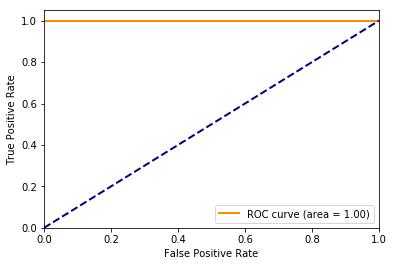

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from array import array
import numpy as np
from sklearn.metrics import roc_curve, auc

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(df_train_np, ytrain_num_np)
df_train_np_predict=clf.predict(df_train_np)

y2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,1, 1, 1])
ytrain_num_2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,1, 1, 1])
fpr, tpr, _ = roc_curve(y2, ytrain_num_2)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()


#### (d) v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously

In [383]:
list_te

[     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
 0                  0      39.25       0.43      22.75       0.43      33.75   
 1                250      39.25       0.43      23.00       0.00      33.00   
 2                500      39.25       0.43      23.25       0.43      33.00   
 3                750      39.50       0.50      23.00       0.71      33.00   
 4               1000      39.50       0.50      24.00       0.00      33.00   
 ..               ...        ...        ...        ...        ...        ...   
 475           118750      43.33       0.47      25.00       0.00      30.00   
 476           119000      43.50       0.50      25.50       0.50      30.00   
 477           119250      43.50       0.50      24.75       0.43      30.00   
 478           119500      43.50       0.50      24.33       0.47      30.00   
 479           119750      43.50       0.50      24.25       0.43      30.00   
 
      var_rss23  
 0          1.3  
 1

In [108]:
df_test=pd.DataFrame()
df_t1=pd.DataFrame()
te_i=0

for key in dict_test:
    #print(key)
    te_df=dict_test[key]
    te_i+=1
    for j in range(1,7):
        df_t1['instance']=[te_i]
        df_t1['min'+str(j)]=[te_df.iloc[:,j].min()]
        df_t1['max'+str(j)]=[te_df.iloc[:,j].max()]
        df_t1['mean'+str(j)]=[te_df.iloc[:,j].mean()]
        df_t1['median'+str(j)]=[te_df.iloc[:,j].median()]
        df_t1['std'+str(j)]=[te_df.iloc[:,j].std()]
        df_t1['1st.quartile'+str(j)]=[te_df.iloc[:,j].quantile(0.25)]
        df_t1['3st.quartile'+str(j)]=[te_df.iloc[:,j].quantile(0.75)]
    #df= pd.DataFrame(map_data,columns=['min1', 'max1', 'mean1', 'median1','standard deviation1','first quartile1','third quartile1','min2', 'max2', 'mean2', 'median2','standard deviation2','first quartile2','third quartile2','min3', 'max3', 'mean3', 'median3','standard deviation3','first quartile3','third quartile3','min4', 'max4', 'mean4', 'median4','standard deviation4','first quartile4','third quartile4','min5', 'max5', 'mean5', 'median5','standard deviation5','first quartile5','third quartile5','min6', 'max6', 'mean6', 'median6','standard deviation6','first quartile6','third quartile6'])
    df_test=pd.concat([df_t1,df_test])

In [109]:
df_test_np=df_test.to_numpy()
df_test_np

array([[1.90000000e+01, 2.20000000e+01, 4.46700000e+01, 3.70587083e+01,
        3.60000000e+01, 3.71017970e+00, 3.45000000e+01, 4.00625000e+01,
        0.00000000e+00, 1.41700000e+01, 2.43814583e+00, 1.92000000e+00,
        1.99688727e+00, 1.25000000e+00, 3.35000000e+00, 6.33000000e+00,
        2.40000000e+01, 1.63883125e+01, 1.65000000e+01, 3.53795033e+00,
        1.37500000e+01, 1.90000000e+01, 0.00000000e+00, 9.74000000e+00,
        2.98068750e+00, 2.86000000e+00, 1.61205860e+00, 1.79000000e+00,
        4.00000000e+00, 7.50000000e+00, 2.42500000e+01, 1.81259583e+01,
        1.88750000e+01, 3.53714384e+00, 1.60000000e+01, 2.10000000e+01,
        0.00000000e+00, 8.55000000e+00, 2.98375000e+00, 2.57000000e+00,
        1.81572972e+00, 1.50000000e+00, 4.15000000e+00],
       [1.80000000e+01, 2.87500000e+01, 4.47500000e+01, 3.75611875e+01,
        3.68750000e+01, 3.22650694e+00, 3.52500000e+01, 4.02500000e+01,
        0.00000000e+00, 9.91000000e+00, 2.08068750e+00, 1.70000000e+00,
       

In [111]:
ytest_num=[0]*15+[1]*4
ytest_num_np=np.asarray(ytest_num)
ytest_num_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [117]:
rfe_tecv=RFECV(model, step=1, cv=3, scoring='accuracy')
rfe_tecv=rfe_tecv.fit(df_test_np//l,ytest_num_np)
#f1_score=f1_score(ytest_num_np,rfe_tecv.predict(df_test_np//l))
print("f1_score:",f1_score)

f1_score: 1.0


In [196]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(df_train_np, ytrain_num_np)
df_test_np_predict=clf.predict(df_test_np)
df_test_np_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [129]:
from sklearn.metrics import confusion_matrix
CM_2= confusion_matrix(ytest_num_np,df_test_np_predict)
CM_2

array([[15,  0],
       [ 0,  4]])

In [36]:
import math

def sliced_train(l,oridata):
    sliced_data=[]
    for item in oridata:
        n=math.ceil(len(item)/l)    
        temp=[]
        start=0
        stop=n
        while length>0:
            temp.append(item[0:n,:])
            start=stop
            if(n>length):
                stop=length
            else:
                stop=n
        filln=n-len(temp[l-1])
        if filln>0:
            multilist=[[0 for col in range(6) for row in range(filln)]]
            temp[l-1]=np.concatenate((temp[l-1],multilist))
        temp=np.array(temp)
        tup=tuple
        result=np.concatenate(tup, axis=1)
        sliced_data.append(result)
    sliced_data.to_numpy()
    return sliced_data

#### (d) vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

In [122]:
print("yes. It seem to be well-separated.")

yes. It seem to be well-separated.


#### (d) vii. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [185]:
print("yes. It seem to be well-separated.")
print("yes.")

yes. It seem to be well-separated.
yes.


In [195]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(df_train_np, ytrain_num_np)
df_test_np_predict=clf.predict(df_test_np)
df_test_np_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [127]:
from sklearn.metrics import confusion_matrix
CM_2= confusion_matrix(ytest_num_np,df_test_np_predict)
CM_2

array([[15,  0],
       [ 0,  4]])

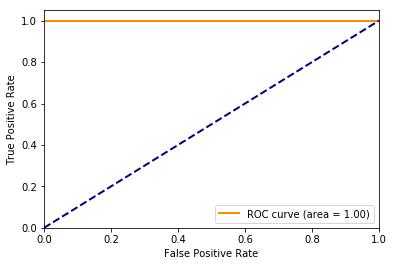

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from array import array
import numpy as np
from sklearn.metrics import roc_curve, auc

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(df_train_np, ytrain_num_np)
df_train_np_predict=clf.predict(df_train_np)

#y1=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
#ytest_num_2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
fpr, tpr, _ = roc_curve(y2, ytrain_num_2)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()
#cite from: https://martychen920.blogspot.com/2017/10/mlroccurve.html

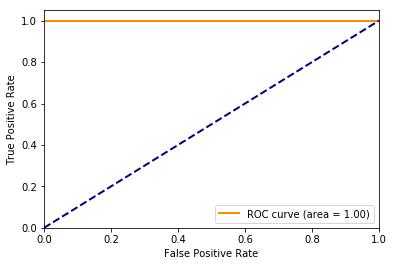

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from array import array
import numpy as np
from sklearn.metrics import roc_curve, auc

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(df_train_np, ytrain_num_np)
df_test_np_predict=clf.predict(df_test_np)

y1=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
ytest_num_2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
fpr, tpr, _ = roc_curve(y1, ytest_num_2)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()

#### (e) i. Repeat 1(d)iii using L1-penalized logistic regression, i.e. instead of using p-values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

/Users/pks19951017/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


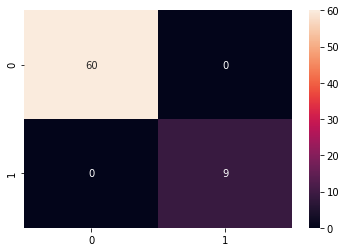

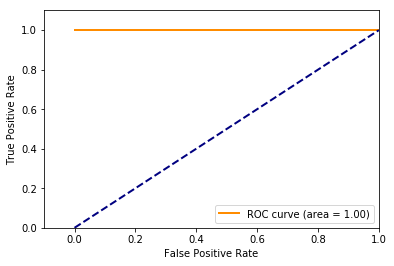

In [200]:
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from array import array
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns

rfe_trcv=RFECV(model, step=1, cv=3, scoring='accuracy')
rfe_trcv=rfe_tecv.fit(df_train_np//l,ytrain_num_np)
clf = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial', penalty='l1').fit(df_train_np, ytrain_num_np)
df_test_np_predict=clf.predict(df_train_np)

#y1=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
#ytest_num_2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
fpr, tpr, _ = roc_curve(y2, ytrain_num_2)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

ax = sns.heatmap(CM, annot=True)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()
#cite from: http://seaborn.pydata.org/generated/seaborn.heatmap.html

/Users/pks19951017/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


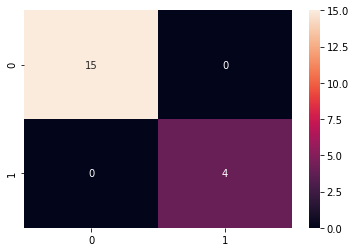

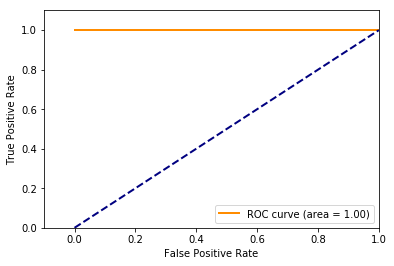

In [199]:
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from array import array
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns

rfe_tecv=RFECV(model, step=1, cv=3, scoring='accuracy')
rfe_tecv=rfe_tecv.fit(df_test_np//l,ytest_num_np)
clf = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial', penalty='l1').fit(df_train_np, ytrain_num_np)
df_test_np_predict=clf.predict(df_test_np)

y1=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
ytest_num_2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
fpr, tpr, _ = roc_curve(y1, ytest_num_2)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

ax = sns.heatmap(CM_2, annot=True)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()

#### (e) ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [169]:
print("p-values selection performs better. L1-penalized is easier to implement.")

p-values selection performs better. L1-penalized is easier to implement.


#### (f) i. Find the best l in the same way as you found it in 1(e)i to build an L1-penalized multinomial regression model to classify all activities in your train-ing set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

error: 0.0
best l:1


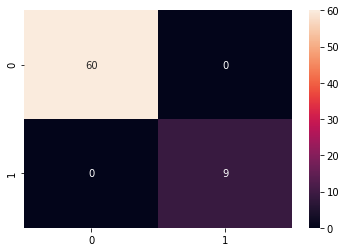

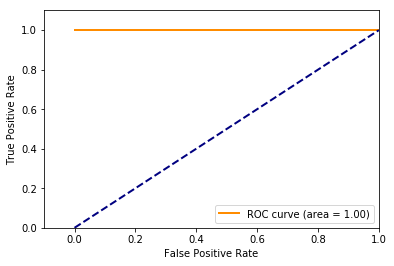

In [201]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from array import array
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import confusion_matrix

CM = confusion_matrix( ytrain_num_np,df_train_np_predict)
rfe_trcv=RFECV(model, step=1, cv=3, scoring='accuracy')
rfe_trcv=rfe_trcv.fit(df_train_np//l,ytrain_num_np)
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1').fit(df_train_np, ytrain_num_np)
df_test_np_predict=clf.predict(df_train_np)

#y1=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
#ytest_num_2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
fpr, tpr, _ = roc_curve(y2, ytrain_num_2)
roc_auc = auc(fpr, tpr)
error=mean_squared_error(y2,ytrain_num_2)
print("error:",error)
print("best l:1")

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

ax = sns.heatmap(CM, annot=True)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()


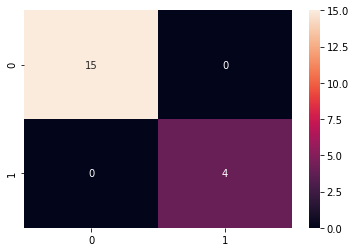

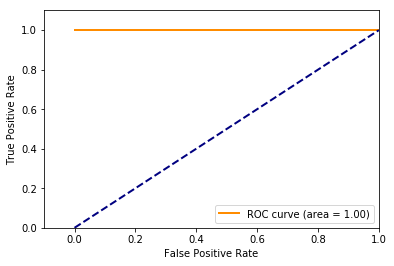

In [202]:
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from array import array
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns

rfe_tecv=RFECV(model, step=1, cv=3, scoring='accuracy')
rfe_tecv=rfe_tecv.fit(df_test_np//l,ytest_num_np)
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1').fit(df_train_np, ytrain_num_np)
df_test_np_predict=clf.predict(df_test_np)

y1=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
ytest_num_2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
fpr, tpr, _ = roc_curve(y1, ytest_num_2)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

ax = sns.heatmap(CM_2, annot=True)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()

#### (f) ii.Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi-nomial priors and compare the results.

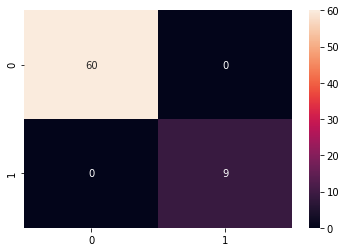

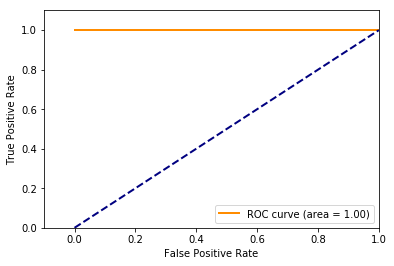

In [211]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(df_train_np//l, ytrain_num_np).predict(df_train_np//l)
y_pred_2 = gnb.fit(df_test_np//l, ytest_num_np).predict(df_test_np//l)
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

ax = sns.heatmap(CM, annot=True)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()
#print(y_pred)
#print(y_pred_2)

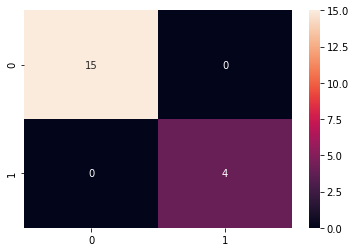

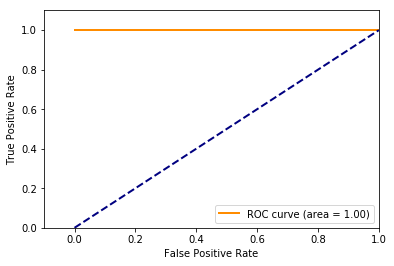

In [212]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(df_train_np//l, ytrain_num_np)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf_2 = MultinomialNB()
clf_2.fit(df_test_np//l, ytest_num_np)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

ax = sns.heatmap(CM_2, annot=True)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()
#print(clf.predict(df_train_np//l))
#print(clf.predict(df_test_np//l))

#### (f) iii. Which method is better for multi-class classification in this problem?

In [167]:
print("Multi-nomial priors is better.")

Multi-nomial priors is better.


#### 2. (ISLR 3.7.4) I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y =β0 + β1X + β2X2 + β3X3 +ε .

#### (a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X +ε . Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

In [111]:
#p.120
print("It is difficult to know which training RSS is lower between linear or cubic without knowing more in the training data. If X and Y is linear,the RSS for the linear regression may be lower than for the cubic regression.")

It is difficult to know which training RSS is lower between linear or cubic without knowing more in the training data. If X and Y is linear,the RSS for the linear regression may be lower than for the cubic regression.


#### (b) Answer (a) using test rather than training RSS.

In [113]:
print("Test RSS depends upon the test data, so there is no enough information to conclude. However, we may assume that polynomial regression will have a higher test RSS as the overfit from training would have more error than the linear regression.")

Test RSS depends upon the test data, so there is no enough information to conclude. However, we may assume that polynomial regression will have a higher test RSS as the overfit from training would have more error than the linear regression.


#### (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

In [102]:
print("Polynomial regression has lower train RSS than the linear fit because of higher flexibility: no matter what the underlying true relationshop is the more flexible model will closer follow points and reduce train RSS.")

Polynomial regression has lower train RSS than the linear fit because of higher flexibility: no matter what the underlying true relationshop is the more flexible model will closer follow points and reduce train RSS.


#### (d) Answer (c) using test rather than training RSS.

In [103]:
print("There is not enough information to tell which test RSS would be lower for either regression given the problem statement is defined as not knowing “how far it is from linear”. If it is closer to linear than cubic, the linear regression test RSS could be lower than the cubic regression test RSS. Or, if it is closer to cubic than linear, the cubic regression test RSS could be lower than the linear regression test RSS. It is dues to bias-variance tradeoff: it is not clear what level of flexibility will fit data better.")

There is not enough information to tell which test RSS would be lower for either regression given the problem statement is defined as not knowing “how far it is from linear”. If it is closer to linear than cubic, the linear regression test RSS could be lower than the cubic regression test RSS. Or, if it is closer to cubic than linear, the cubic regression test RSS could be lower than the linear regression test RSS. It is dues to bias-variance tradeoff: it is not clear what level of flexibility will fit data better.


#### 3.  (ISLR 4.7.3) This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class-specific mean vector and a class specific covariance matrix. We con-sider the simple case where p = 1; i.e. there is only one feature.Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal dis-tribution, X ∼ N(μk, σk^2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic. Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ1^2 = ... = σK^2.

In [109]:
#p.168
print("According to the previous answer, we may see that finding k for which pk(x) is largest is equivalent to finding k for which is largest. So, this is obviously not linear in x.")

According to the previous answer, we may see that finding k for which pk(x) is largest is equivalent to finding k for which is largest. So, this is obviously not linear in x.


#### 4.  (ISLR 4.7.7) Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was ˆσ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor-mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

In [108]:
#p.170
print("when X=4, p1(4)=0.8e^−((1/72)*(4−10)^2)/(0.8e^−((1/72)*(4−10)^2)+0.2e^−((1/72)(4−0)^2))=0.752")
print("probability:0.752")

when X=4, p1(4)=0.8e^−((1/72)*(4−10)^2)/(0.8e^−((1/72)*(4−10)^2)+0.2e^−((1/72)(4−0)^2))=0.752
probability:0.752


In [287]:
# cite from: https://rpubs.com/ppaquay/65559
# cite from: https://rpubs.com/ppaquay/65560